OpenFace is a Torch based face recognition model. Herein, OpenCV DNN module offers an interface for OpenFace as well. In this way, you can run OpenFace even if Torch is not installed on your environment.

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from deepface.commons import functions #face detection and alignment

Using TensorFlow backend.


In [3]:
cv2.__version__

'4.3.0'

# Face recognition model

You can download pre-trained weights here: https://cmusatyalab.github.io/openface/models-and-accuracies/

In [4]:
model = cv2.dnn.readNetFromTorch("openface_nn4.small2.v1.t7")

# Face recognition pipeline

In [5]:
def findCosineDistance(source_representation, test_representation):
    a = np.matmul(np.transpose(source_representation), test_representation)
    b = np.sum(np.multiply(source_representation, source_representation))
    c = np.sum(np.multiply(test_representation, test_representation))
    return 1 - (a / (np.sqrt(b) * np.sqrt(c)))

def findEuclideanDistance(source_representation, test_representation):
    euclidean_distance = source_representation - test_representation
    euclidean_distance = np.sum(np.multiply(euclidean_distance, euclidean_distance))
    euclidean_distance = np.sqrt(euclidean_distance)
    return euclidean_distance

In [55]:
def verify(img1_path, img2_path, plot = False):
    
    #img1 = functions.detectFace(img1_path, target_size=(96, 96))[0]
    #img2 = functions.detectFace(img2_path, target_size=(96, 96))[0]
    
    img1 = functions.detectFace(img1_path)[0]
    img2 = functions.detectFace(img2_path)[0]
    #--------------------------------
    
    if plot:
        fig = plt.figure()

        ax1 = fig.add_subplot(1,2,1)
        plt.imshow(img1[:,:,::-1])
        plt.axis('off')

        ax2 = fig.add_subplot(1,2,2)
        plt.imshow(img2[:,:,::-1])
        plt.axis('off')

        plt.show()
    
    #--------------------------------
    img1 = cv2.resize(img1, (96, 96))
    img2 = cv2.resize(img2, (96, 96))
    
    img1_blob = cv2.dnn.blobFromImage(img1)
    img2_blob = cv2.dnn.blobFromImage(img2)
    
    model.setInput(img1_blob)
    img1_representation = model.forward()
    
    model.setInput(img2_blob)
    img2_representation = model.forward()
    
    #print("Model represents faces as ",img1_representation[0].shape[0]," dimensional vectors")
    
    euclidean_distance = findEuclideanDistance(img1_representation[0], img2_representation[0])
    cosine_distance = findCosineDistance(l2_normalize(img1_representation[0]), l2_normalize(img2_representation[0]))
    
    print("Euclidean distance: ", round(euclidean_distance, 4))
    print("Cosine distance: ", round(cosine_distance, 4))
    
    
    #if cosine_distance < 0.20:
    if euclidean_distance < 0.60:
        print("Result: verified")
    else:
        print("Result: unverified!")
    
    #return (euclidean_distance, cosine_distance)

# Positives

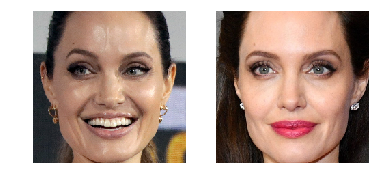

Euclidean distance:  0.4546
Cosine distance:  0.1033
Result: verified


In [56]:
verify("deepface/tests/dataset/img1.jpg", "deepface/tests/dataset/img2.jpg", plot = True)

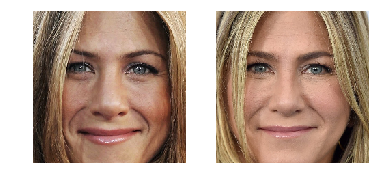

Euclidean distance:  0.5494
Cosine distance:  0.1509
Result: verified


In [57]:
verify("deepface/tests/dataset/img54.jpg", "deepface/tests/dataset/img3.jpg", plot = True)

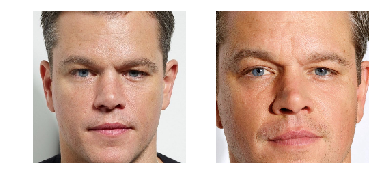

Euclidean distance:  0.6369
Cosine distance:  0.2028
Result: unverified!


In [58]:
verify("deepface/tests/dataset/img30.jpg", "deepface/tests/dataset/img32.jpg", plot = True)

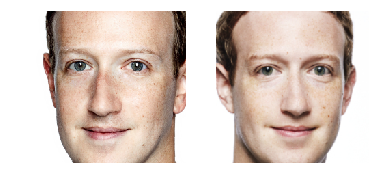

Euclidean distance:  0.4082
Cosine distance:  0.0833
Result: verified


In [59]:
verify("deepface/tests/dataset/img13.jpg", "deepface/tests/dataset/img14.jpg", plot = True)

# Negatives

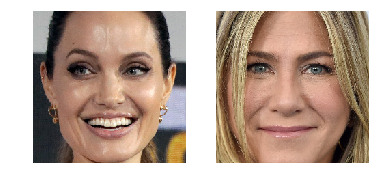

Euclidean distance:  0.6911
Cosine distance:  0.2388
Result: unverified!


In [60]:
verify("deepface/tests/dataset/img1.jpg", "deepface/tests/dataset/img3.jpg", plot = True)

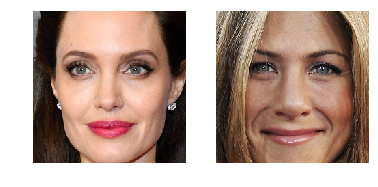

Euclidean distance:  0.8777
Cosine distance:  0.3852
Result: unverified!


In [65]:
verify("deepface/tests/dataset/img2.jpg", "deepface/tests/dataset/img54.jpg", plot = True)

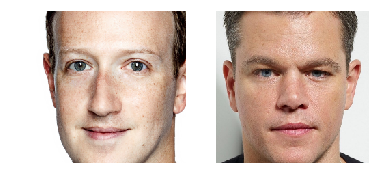

Euclidean distance:  0.8163
Cosine distance:  0.3331
Result: unverified!


In [61]:
verify("deepface/tests/dataset/img13.jpg", "deepface/tests/dataset/img30.jpg", plot = True)

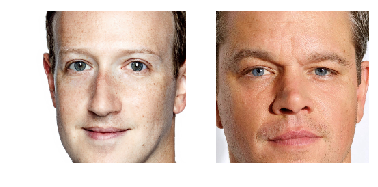

Euclidean distance:  0.9179
Cosine distance:  0.4213
Result: unverified!


In [62]:
verify("deepface/tests/dataset/img13.jpg", "deepface/tests/dataset/img32.jpg", plot = True)

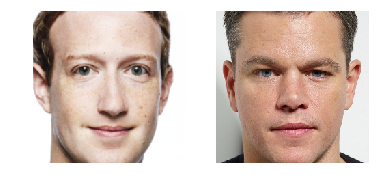

Euclidean distance:  0.6947
Cosine distance:  0.2413
Result: unverified!


In [63]:
verify("deepface/tests/dataset/img14.jpg", "deepface/tests/dataset/img30.jpg", plot = True)

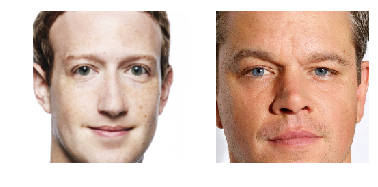

Euclidean distance:  0.9148
Cosine distance:  0.4184
Result: unverified!


In [64]:
verify("deepface/tests/dataset/img14.jpg", "deepface/tests/dataset/img32.jpg", plot = True)